In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [12]:
combined_study_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
combined_study_data.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
Tumor_Data = combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]

Tumor_data_f =Tumor_Data.agg(['mean','median','var','std','sem'])    
Tumor_data_f.head(20)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


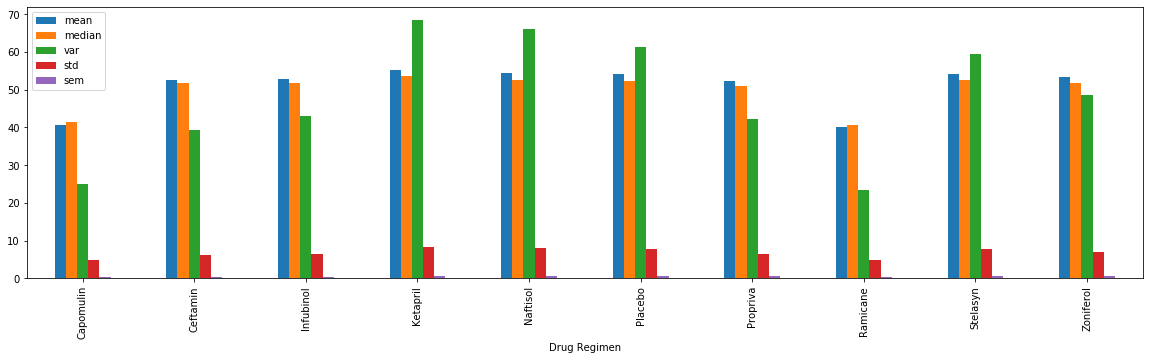

<Figure size 432x288 with 0 Axes>

In [5]:
# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = Tumor_data_f.plot(kind="bar", figsize=(20,5))


plt.show()
plt.tight_layout()

In [6]:
Tumor_Data = pd.DataFrame(combined_study_data.groupby("Drug Regimen").count())
Tumor_Data["Mean"] = pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
Tumor_Data["Median"] = pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
Tumor_Data["Standard Deviation"] = pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
Tumor_Data["Variance"] = pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
Tumor_Data["SEM"] = pd.DataFrame(combined_study_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())


Tumor_Data = Tumor_Data[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

Tumor_Data

,Mouse ID,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,181,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,161,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,228,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,181,54.233149,52.431737,7.710419,59.450562,0.573111


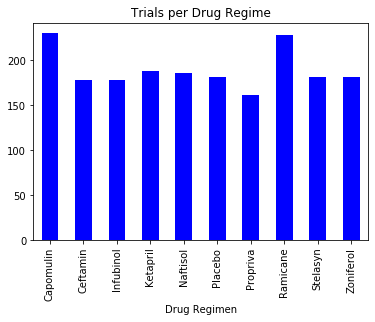

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Filter the DataFrame down only to those columns to chart
Tumor_Data = Tumor_Data[["Mouse ID"]]

# Use DataFrame.plot() in order to create a bar chart of the data
Tumor_Data.plot(kind="bar", figsize=(6,4), color = "b", legend=False)

# Set a title for the chart
plt.title("Trials per Drug Regime")

plt.show()
plt.tight_layout()

(0, 240)

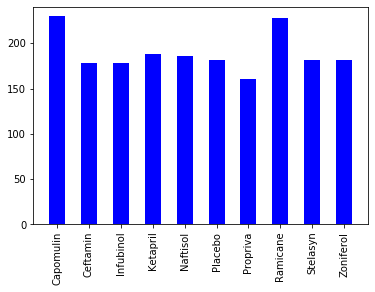

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Set x axis and tick locations
x_axis = np.arange(len(Tumor_Data))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.bar(x_axis, Tumor_Data["Mouse ID"], color = "b", width = .5)
plt.xticks(tick_locations, Tumor_Data.index.values, rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(Tumor_Data["Mouse ID"])+10)

# Set a Title and labels
#plt.title("Trials per Drug Regime")
#plt.xlabel("Drug Regime")


# Save our graph and show the grap
#plt.show()

In [1]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Tumor_sex_Data = pd.DataFrame(combined_study_data.groupby("Sex"))








NameError: name 'pd' is not defined

In [ ]:

explode = (0.1, 0, 0, 0)
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Use DataFrame.plot() in order to create a bar chart of the data
datapoints.plot(kind="pie", explode=explode, labels=datapoints.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, subplots=True,legend=False)

# Set a title for the chart
plt.title("Trials per Drug Regime")

plt.show()

In [122]:
 # Generate a pie plot showing the distribution of female versus male mice using pyplot

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(datapoints["Trials"], explode=explode, labels=datapoints.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set a title for the chart
plt.title("Trials per Drug Regime")

# Save an image of our chart and print the final product to the screen
plt.show()

#Can't get sizing perfect on both the bar and pie graphs, tried a bunch of stuff but I'm calling it good enough

NameError: name 'explode' is not defined

In [124]:
 # Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
 
#Grab just data for the 4 smallest mean tumor volume regimens

filtered_df = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin") | (combined_data["Drug Regimen"] == "Ramicane") | (combined_data["Drug Regimen"] == "Ceftamin") | (combined_data["Drug Regimen"] == "Propriva"), :]

# Sort by Timpepoints based on the latest values
filtered_df = filtered_df.sort_values("Timepoint", ascending = False)

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
filtered_df = filtered_df.drop_duplicates(subset="Mouse ID", keep='first')
    
# Determine quartiles
quartiles = filtered_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print a filtered dataframe of any outliers
outliers_df = filtered_df.loc[(filtered_df['Tumor Volume (mm3)'] > upper_bound) | (filtered_df['Tumor Volume (mm3)'] < lower_bound), :]
outliers_df

# Not finding any outliers. 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


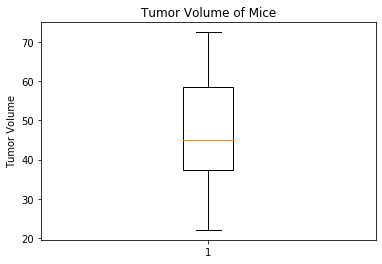

In [125]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Tumor_Volume = filtered_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

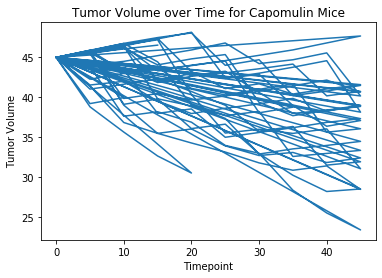

In [126]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Filter original data for just the Capomulin Drug Regime
Capomulin_df = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin"),:]

# Set variables to hold relevant data
timepoint = Capomulin_df["Timepoint"]
tumor_volume = Capomulin_df["Tumor Volume (mm3)"]

# Plot the tumor volume for various mice
tumor_volume_line, = plt.plot(timepoint, tumor_volume)

# Show the chart, add labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.show()

# I think you are looking for one mouse instead of all?  But I think this is more interesting.
# To find one mouse I would add another .loc to filter on one mouse before plotting. 

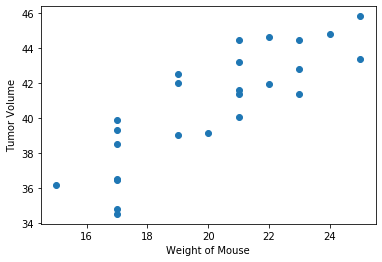

In [127]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Pull values for x and y values
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

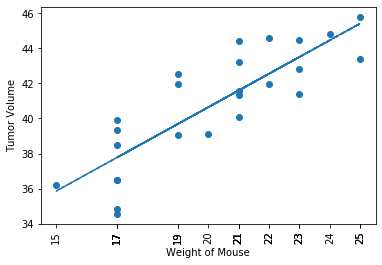

The correlation between weight and tumor value is 0.84


In [128]:
 # Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen 

# Pull values for x and y values
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression on year versus violent crime rate
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# Create equation of line to calculate predicted violent crime rate
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')